<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Competency_with_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Function to apply the competency formula dynamically
def calculate_competency(row, w_B, w_T, w_C, w_A, f):
    # Extracting values from the row
    B = row['Bloom_level_weight']    # Bloom's taxonomy level
    T = row['Tool_weight']  # Resource quality (0-100)
    A = row['Assessment']  # Indication (0-1)

    # Static competency from resource characteristics
    C_0 = w_C * (w_B * B + w_T * T)

    # Dynamic adjustment based on assessment score
    D_A = w_A * f(A)

    # Final competency calculation
    C = C_0 + D_A
    return C

# Function for assessment function (f(A))
def assessment_function(A):
    return A**2  # Example: Exponential relationship (A^2)

# Read the Excel file into a DataFrame
input_file = '/content/rke131-7122024.xlsx'  # Path to the input Excel file
df = pd.read_excel(input_file)

# Define static weights
w_B = 0.04  # Weight for Bloom's Level
w_T = 0.0372  # Weight for Resource Quality
w_C = 0.1091  # Weight for Competencies in Credits
w_A = 0.3  # Weight for Assessment Score

# Apply the competency formula to each row in the DataFrame
df['Competency_Indicator'] = df.apply(calculate_competency, axis=1,
                                      w_B=w_B, w_T=w_T, w_C=w_C, w_A=w_A, f=assessment_function)

# Optional: Check the results (e.g., checking if the competency is within expected bounds)
df['Competency_Check'] = df['Competency_Indicator'].apply(lambda x: 0 <= x <= 1)

# Save the updated DataFrame to a new Excel file
output_file = '/content/output10.xlsx'  # Path for the output Excel file
df.to_excel(output_file, index=False)

print(f"Updated data saved to {output_file}")


Updated data saved to /content/output10.xlsx


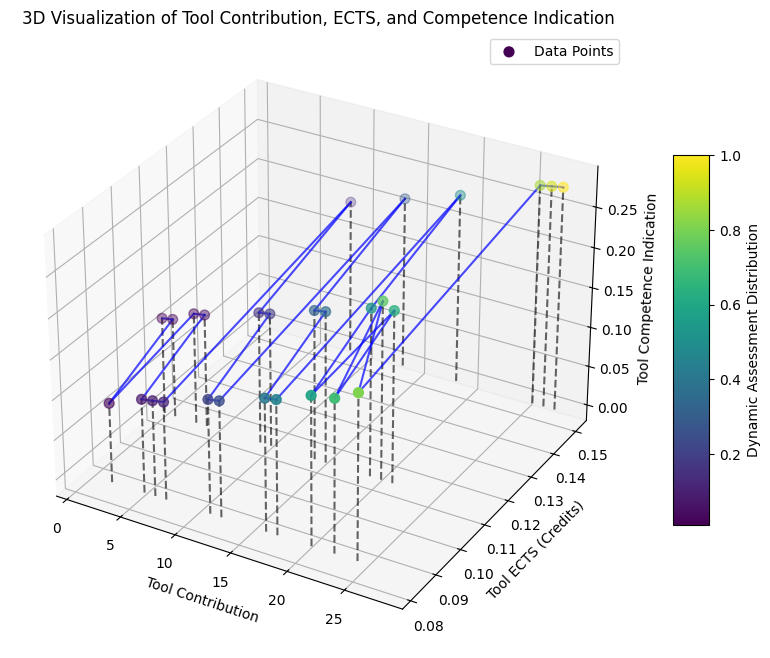

3D visualization saved to 3d_tool_visualization.png


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function for dynamic non-linear assessment distribution
def dynamic_assessment_distribution(start, end, points):
    # Generate a range of assessment values (non-linear)
    x = np.linspace(start, end, points)
    y = x**2  # Example: Quadratic distribution
    return x, y

# Read data from Excel
input_file = '/content/output 7-12-2023.xlsx'  # Path to the Excel file
df = pd.read_excel(input_file)

# Extract necessary columns
tool_contribution = df['Tool_contribution']  # Example column for contributions
tool_ects = df['Tool_ECTS']                  # ECTS (credit weight) values
tool_competence_indication = df['Tool_competence_indication']  # Competency indicators

# Create dynamic non-linear assessment distribution
assessment_range, assessment_distribution = dynamic_assessment_distribution(0.1, 1.0, len(df))

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data
sc = ax.scatter(tool_contribution, tool_ects, tool_competence_indication, c=assessment_distribution, cmap='viridis', label='Data Points', s=50)

# Add connecting lines between data points
for i in range(len(tool_contribution)):
    ax.plot([tool_contribution[i], tool_contribution[i]],
            [tool_ects[i], tool_ects[i]],
            [0, tool_competence_indication[i]], 'k--', alpha=0.6)  # Vertical line
    ax.plot([tool_contribution[i], tool_contribution[i + 1]] if i + 1 < len(tool_contribution) else [tool_contribution[i], tool_contribution[i]],
            [tool_ects[i], tool_ects[i + 1]] if i + 1 < len(tool_ects) else [tool_ects[i], tool_ects[i]],
            [tool_competence_indication[i], tool_competence_indication[i + 1]] if i + 1 < len(tool_competence_indication) else [tool_competence_indication[i], tool_competence_indication[i]],
            'b-', alpha=0.7)  # Connecting line

# Labeling axes
ax.set_xlabel('Tool Contribution')
ax.set_ylabel('Tool ECTS (Credits)')
ax.set_zlabel('Tool Competence Indication')

# Adding color bar for assessment distribution
cb = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=10)
cb.set_label('Dynamic Assessment Distribution')

# Set title and show the plot
ax.set_title('3D Visualization of Tool Contribution, ECTS, and Competence Indication')
plt.legend()
plt.show()

# Save visualization as image
output_image = '3d_tool_visualization.png'
fig.savefig(output_image)
print(f"3D visualization saved to {output_image}")



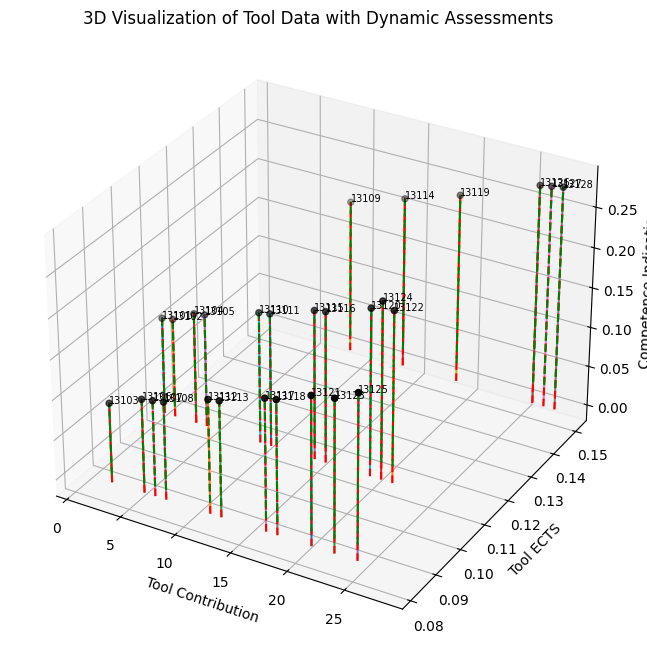

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Excel data
input_file = '/content/output 7-12-2023.xlsx'  # Path to the Excel file
df = pd.read_excel(input_file)

# Define dynamic assessment distribution (linear and non-linear)
assessment_range = np.linspace(0.1, 1.0, 50)  # Dynamic values from 0.1 to 1.0
linear_distribution = assessment_range
non_linear_distribution = assessment_range ** 2  # Example: Non-linear is quadratic

# Prepare data for 3D plotting
tool_codes = df['Tool_code'].unique()  # Unique tool codes
tool_contributions = []  # For 3D plotting x-axis
tool_ects = []  # For 3D plotting y-axis
competence_indications = []  # For 3D plotting z-axis
assessment_distributions = []  # Horizontal lines (dynamic assessment)

# Loop through tool codes to organize data
for tool in tool_codes:
    tool_data = df[df['Tool_code'] == tool]
    contribution = tool_data['Tool_contribution'].values[0]
    ects = tool_data['Tool_ECTS'].values[0]
    competence = tool_data['Tool_competence_indication'].values[0]

    # Append static data
    tool_contributions.append(contribution)
    tool_ects.append(ects)
    competence_indications.append(competence)

    # Append dynamic assessment data
    assessment_distributions.append(non_linear_distribution * competence)

# Convert lists to arrays for plotting
tool_contributions = np.array(tool_contributions)
tool_ects = np.array(tool_ects)
competence_indications = np.array(competence_indications)
assessment_distributions = np.array(assessment_distributions)

# Create 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot static points for each Tool_Code
ax.scatter(tool_contributions, tool_ects, competence_indications, color='black', label='Tool Points')

# Annotate points with Tool_code
# Change the loop to iterate through tool_codes instead of tool
for i in range(len(tool_codes)):
    ax.text(tool_contributions[i], tool_ects[i], competence_indications[i],
            f'{tool_codes[i]}', fontsize=7, color='black')  # Use tool_codes[i] for annotation

# Plot dynamic assessment lines
for idx, assessment in enumerate(assessment_distributions):
    ax.plot(tool_contributions[idx] * np.ones_like(assessment),
            tool_ects[idx] * np.ones_like(assessment),
            assessment, label=f'Tool {tool_codes[idx]}')

# Add vertical and horizontal lines for each Tool_Code
for idx in range(len(tool_contributions)):
    # Vertical line (from origin to point)
    ax.plot([tool_contributions[idx]] * 2,
            [tool_ects[idx]] * 2,
            [0, competence_indications[idx]], color='red', linestyle='--')

    # Horizontal line (dynamic assessment along contribution axis)
    ax.plot(tool_contributions[idx] * np.ones_like(assessment_range),
            [tool_ects[idx]] * len(assessment_range),
            linear_distribution * competence_indications[idx], color='green', linestyle='--')

# Set labels and title
ax.set_xlabel('Tool Contribution')
ax.set_ylabel('Tool ECTS')
ax.set_zlabel('Competence Indication')
ax.set_title('3D Visualization of Tool Data with Dynamic Assessments')



# Show the plot
plt.show()


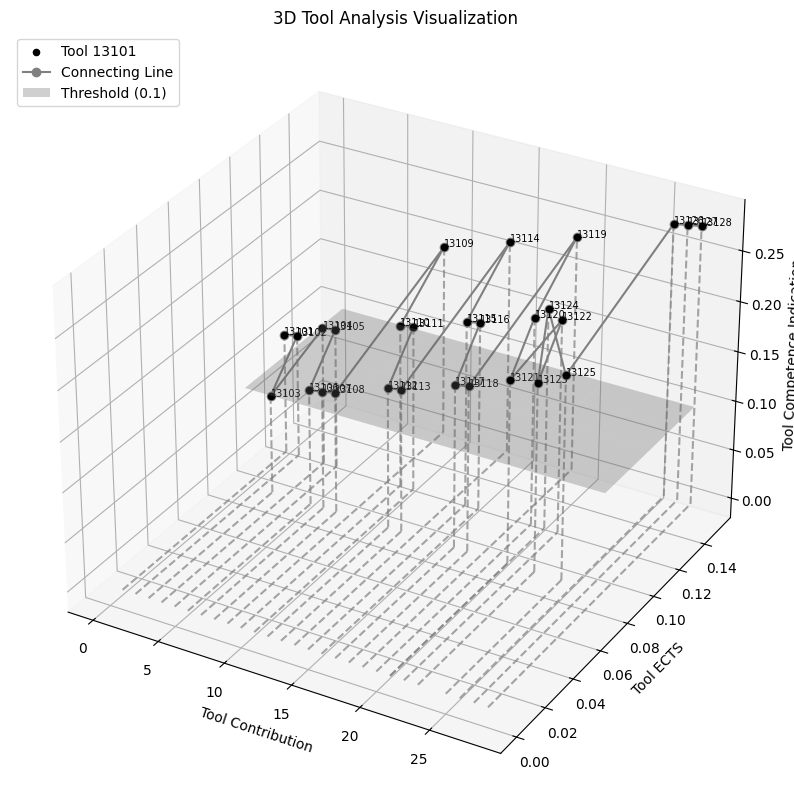

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read Excel data
input_file = '/content/output 7-12-2023.xlsx'  # Path to the input Excel file
df = pd.read_excel(input_file)

# Function to generate dynamic assessment distributions
def generate_assessment_distributions(start=0.1, stop=1.0, steps=10):
    return np.linspace(start, stop, steps)

# 3D Visualization Function
def plot_3d_visualization(df, assessment_distributions, threshold=0.1):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Extract data
    tool_code = df['Tool_code']
    tool_contribution = df['Tool_contribution']  # Define tool_contribution here
    tool_ects = df['Tool_ECTS']
    tool_competence = df['Tool_competence_indication']
    tool_codes = df['Tool_code'].unique()  # Add this line to define tool_codes
    tool_contributions = []  # Define tool_contributions here
    tool_ectss = []  # Define tool_contributions here
    competence_indicationss = []  # Define tool_contributions here

    # Scatter plot points with vertical lines
    for i in range(len(tool_code)):
        # Static data points
        x = tool_contribution[i]
        y = tool_ects[i]
        z = tool_competence[i]

        tool_contributions.append(x)
        tool_ectss.append(y)
        competence_indicationss.append(z)

        # Draw vertical and horizontal lines from points
        ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='--', alpha=0.7)  # Vertical line
        ax.plot([x, x], [0, y], [0, 0], color='gray', linestyle='--', alpha=0.7)  # Horizontal line

        # Plot points for tools
        ax.scatter(x, y, z, color='black', label=f'Tool {tool_code[i]}' if i == 0 else "")

    # Annotate points with Tool_code (moved outside the loop)
    for i in range(len(tool_codes)):
        ax.text(tool_contributions[i], tool_ectss[i], competence_indicationss[i],
                f'{tool_codes[i]}', fontsize=7, color='black')

    # Line connecting points based on assessment distributions
    for i, assessment in enumerate(assessment_distributions):
        # Accessing data within the loop using index 'i'
        dynamic_contributions = df['Tool_contribution'].values[i] * assessment
        dynamic_ects = df['Tool_ECTS'].values[i] * assessment
        dynamic_competence = df['Tool_competence_indication'].values[i] * assessment

        # Connecting line points
        ax.plot(dynamic_contributions, dynamic_ects, dynamic_competence, color='green', alpha=0.5)
    # Connecting line between points
    ax.plot(tool_contribution, tool_ects, competence_indicationss,
            color='gray', linestyle='-', marker='o', label='Connecting Line')

    # Threshold plane (using tool_contribution defined outside the loop)
    xx, yy = np.meshgrid(
        np.linspace(min(tool_contribution), max(tool_contribution), 5),
        np.linspace(min(tool_ects), max(tool_ects), 5)
    )
    zz = np.full(xx.shape, threshold)
    ax.plot_surface(xx, yy, zz, color='gray', alpha=0.3, label="Threshold (0.1)")

    # Labels and titles
    ax.set_xlabel('Tool Contribution')
    ax.set_ylabel('Tool ECTS')
    ax.set_zlabel('Tool Competence Indication')
    ax.set_title('3D Tool Analysis Visualization')

    # Add legend
    ax.legend(loc='upper left', fontsize=10)

    plt.show()

# Generate dynamic assessment distributions
assessment_distributions = generate_assessment_distributions()

# Call the visualization function
plot_3d_visualization(df, assessment_distributions)


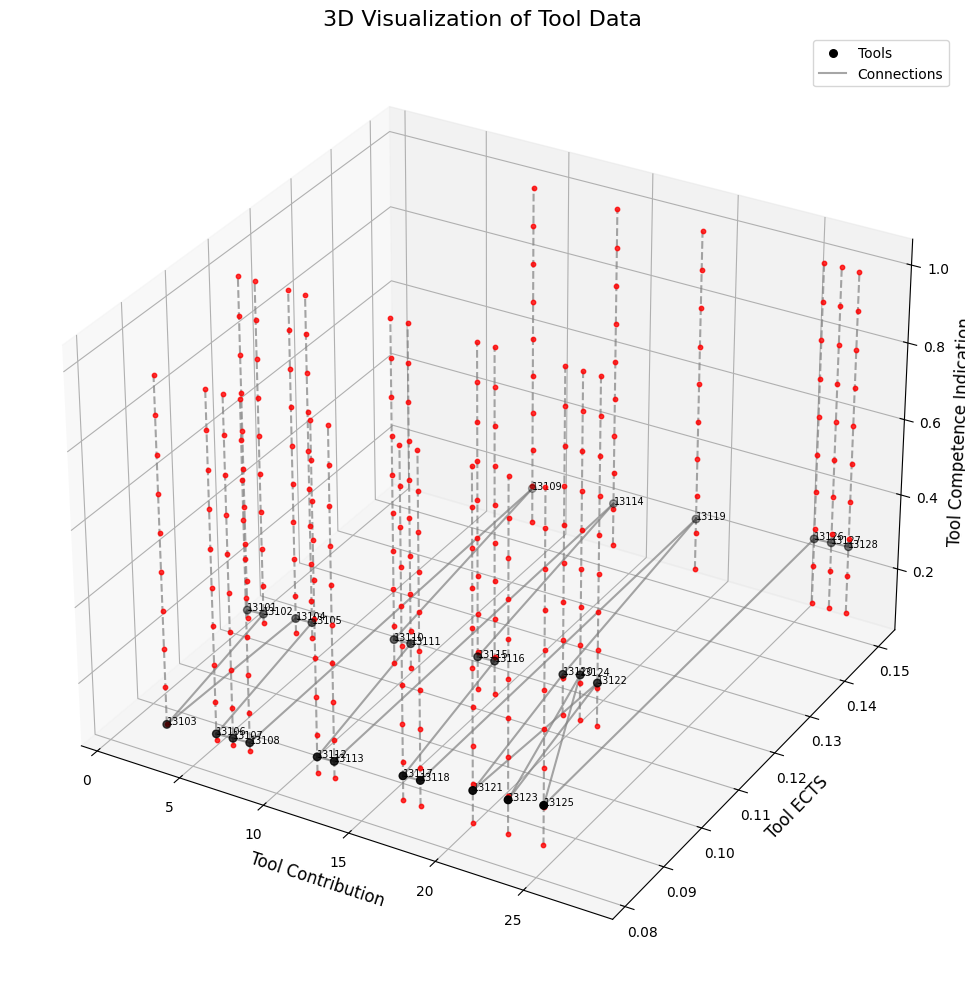

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from Excel
input_file = '/content/output 7-12-2023.xlsx'  # Path to the input Excel file
df = pd.read_excel(input_file)

# Extract columns for visualization
tool_codes = df['Tool_code']
tool_contributions = df['Tool_contribution']
tool_ects = df['Tool_ECTS']
tool_competence = df['Tool_competence_indication']

# Set threshold
threshold = 0.1

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of points for each tool
ax.scatter(tool_contributions, tool_ects, tool_competence, c='black', s=30, label='Tools', depthshade=True)

    # Annotate points with Tool_code (moved outside the loop)
for i in range(len(tool_codes)):
        ax.text(tool_contributions[i], tool_ects[i], tool_competence[i],
                f'{tool_codes[i]}', fontsize=7, color='black')

# Add vertical lines for each tool, showing the assessment distribution
for i in range(len(tool_codes)):
    x = tool_contributions[i]
    y = tool_ects[i]
    z_start = 0.1
    z_end = 1.0

    # Vertical line for assessment distribution
    ax.plot([x, x], [y, y], [z_start, z_end], color='gray', linestyle='--', alpha=0.7)

    # Highlight points on vertical line for threshold steps
    assessment_steps = np.arange(z_start, z_end + threshold, threshold)
    for z in assessment_steps:
        ax.scatter([x], [y], [z], c='red', s=10, alpha=0.8)

# Connecting lines between points
for i in range(len(tool_codes) - 1):
    x_line = [tool_contributions[i], tool_contributions[i + 1]]
    y_line = [tool_ects[i], tool_ects[i + 1]]
    z_line = [tool_competence[i], tool_competence[i + 1]]
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.7, label='Connections' if i == 0 else "")



# Labels and legend
ax.set_title("3D Visualization of Tool Data", fontsize=16)
ax.set_xlabel("Tool Contribution", fontsize=12)
ax.set_ylabel("Tool ECTS", fontsize=12)
ax.set_zlabel("Tool Competence Indication", fontsize=12)
ax.legend()

# Add grid
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()
